# Отчёт по лабораторной работе №4
## по дисциплине Машинное обучение
## Вариант 12
### Выполнил: Игнаков К. М.    19-ИВТ-3

Лабораторная работа № 3 – Регрессионный анализ данных
Цель лабораторной работы – получение навыков работы с методами регрессии
1.    Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.    Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.    Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.    Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.    Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.    Заполните пропущенные значения в данных;
7.    Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

from pylab import rcParams      # Для изменения размеров гистрограммы

%matplotlib inline

## Air Quality Data Set

Информация о наборе данных:
Набор данных содержит 9358 экземпляров усредненных по часам измерений набора из 5 химических датчиков оксида металла, встроенных в химический мультисенсор качества воздуха. Устройство было расположено на поле в значительно
загрязненном районе, на уровне дороги, в итальянском городе. Данные были записаны в период с марта 2004 года по февраль 2005 года (один год), что представляет собой самые длинные в свободном доступе записи измерений химических датчиков качества воздуха, установленных на местах. 

Среднечасовые концентрации CO, неметановых углеводородов, бензола, всех оксидов азота (NOx) и диоксид азота (NO2) и были предоставлены совместно расположенным эталонным сертифицированным анализатором.
Доказательства перекрестной чувствительности, а также дрейфы концепции и датчиков присутствуют, как описано в De Vito et al.,

Sens. И Act. B, Vol. 129,2,2008 (требуется цитирование), в конечном итоге влияющие на возможности оценки концентрации датчиков. Пропущенные значения помечаются значением -200.

Этот набор данных может использоваться исключительно для исследовательских целей. Коммерческие цели полностью исключены.

Входные переменные:

0. Дата (ДД/ММ/ГГГГ)
1. Время (ЧЧ.ММ.СС)
2. Истинная почасовая усредненная концентрация CO в мг/м^3 (эталонный анализатор)
3. PT 08.S1 (оксид олова) усредненный по часам отклик датчика (номинально CO))
4. Истинная почасовая усредненная общая концентрация неметаллических углеводородов в мкг/м^3 (эталонный анализатор)
5. Истинная почасовая усредненная концентрация бензола в мкг/м^3 (эталонный анализатор)
6. PT08.S2 (титан) усредненный по часам отклик датчика (номинально NMHC))
7. Истинная почасовая усредненная концентрация NOx в миллиардных долях (эталонный анализатор)
8. PT08.S3 (оксид вольфрама) усредненный по часам отклик датчика (номинально NOx))
9. Истинная почасовая усредненная концентрация NO2 в мкг/м^3 (эталонный анализатор)
10. PT 08.S4 (оксид вольфрама) усредненный по часам отклик датчика (номинально NO2)
11. PT08.S5 (оксид индия) усредненный по часам отклик датчика (номинально O3))
12. Температура в ° C
13. Относительная влажность (%)
14. Абсолютная влажность (AH)

In [2]:
df_air = pd.read_csv ("../data/AirQualityUCI.csv", sep=';')

In [3]:
# Какой-то косяк с даьасетом, появились 2 левых столбца и пустые поля.
df_air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим лишние столбцы и строки

In [4]:
df_air.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
df_air.dropna(inplace=True)

In [5]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [6]:
df_air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [7]:
df_air.drop(['NMHC(GT)'], axis=1, inplace=True)

#### Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [8]:
print("Количество записей до удаления дубликатов:", df_air.shape[0])

Количество записей до удаления дубликатов: 9357


In [9]:
df_air.drop_duplicates(keep='first', inplace=True)  

In [10]:
print("Количество записей после удаления дубликатов:", df_air.shape[0])

Количество записей после удаления дубликатов: 9357


Дубликаты отсутствуют

In [11]:
def repl(x: str, _from=',', _to='.'):
    return x.replace(_from, _to)

In [12]:
def to_hours(x: str):
    return int(x.split('.')[0])

In [13]:
df_air['Time'] = df_air['Time'].apply(to_hours)

In [14]:
try:
    df_air['CO(GT)']   = pd.to_numeric(df_air['CO(GT)'].apply(repl))
    df_air['C6H6(GT)'] = pd.to_numeric(df_air['C6H6(GT)'].apply(repl))
    df_air['T']        = pd.to_numeric(df_air['T'].apply(repl))
    df_air['RH']       = pd.to_numeric(df_air['RH'].apply(repl))
    df_air['AH']       = pd.to_numeric(df_air['AH'].apply(repl))
except:
    print('Перезапусти ядро, некоторые столбцы уже float64')

In [15]:
df_air['Date'] = pd.to_datetime(df_air['Date'])

In [16]:
# 200 является "NaN"
(df_air[df_air.columns] == -200).sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [17]:
# ['CO(GT)', 'NOx(GT)', 'NO2(GT)'] - очень много NaN
df_air = df_air.loc[df_air['CO(GT)'] != -200]

In [18]:
df_air = df_air.loc[df_air['NO2(GT)'] != -200]

In [19]:
df_air = df_air.loc[df_air['PT08.S1(CO)'] != -200]

In [20]:
(df_air[df_air.columns] == -200).sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [21]:
# Больше нет пропущенных значений
df_air.reset_index(inplace=True)
df_air

,index,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,2004-10-03,18,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1,2004-10-03,19,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2,2004-10-03,20,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3,2004-10-03,21,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,4,2004-10-03,22,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,9352,2005-04-04,10,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
6937,9353,2005-04-04,11,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
6938,9354,2005-04-04,12,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
6939,9355,2005-04-04,13,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


#### Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [22]:
numerical = []
for i in df_air.columns:
    if (df_air[i].dtype == np.float64 or df_air[i].dtype == np.int64):
        numerical.append(df_air[i].name)
numerical

['index',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Time'),
  Text(1, 0, 'CO(GT)'),
  Text(2, 0, 'PT08.S1(CO)'),
  Text(3, 0, 'C6H6(GT)'),
  Text(4, 0, 'PT08.S2(NMHC)'),
  Text(5, 0, 'NOx(GT)'),
  Text(6, 0, 'PT08.S3(NOx)'),
  Text(7, 0, 'NO2(GT)'),
  Text(8, 0, 'PT08.S4(NO2)'),
  Text(9, 0, 'PT08.S5(O3)'),
  Text(10, 0, 'T'),
  Text(11, 0, 'RH'),
  Text(12, 0, 'AH')])

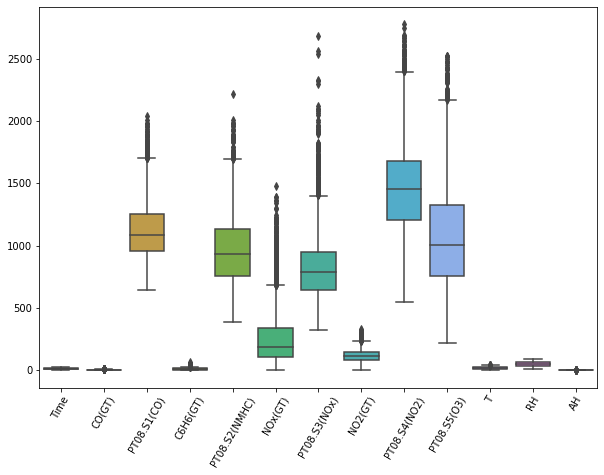

In [23]:
rcParams['figure.figsize'] = 10, 7
sns.boxplot(data=df_air[numerical[1:]], orient = 'v')
plt.xticks(rotation=60)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
temperture = df_air['T']
temperture

0       13.6
1       13.3
2       11.9
3       11.0
4       11.2
        ... 
6936    21.9
6937    24.3
6938    26.9
6939    28.3
6940    28.5
Name: T, Length: 6941, dtype: float64

In [26]:
# Нормализация
sc = MinMaxScaler()
df_air_scaled = sc.fit_transform(df_air[numerical])

df_air_scaled = pd.DataFrame(df_air_scaled, columns=numerical)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'index'),
  Text(1, 0, 'Time'),
  Text(2, 0, 'CO(GT)'),
  Text(3, 0, 'PT08.S1(CO)'),
  Text(4, 0, 'C6H6(GT)'),
  Text(5, 0, 'PT08.S2(NMHC)'),
  Text(6, 0, 'NOx(GT)'),
  Text(7, 0, 'PT08.S3(NOx)'),
  Text(8, 0, 'NO2(GT)'),
  Text(9, 0, 'PT08.S4(NO2)'),
  Text(10, 0, 'PT08.S5(O3)'),
  Text(11, 0, 'T'),
  Text(12, 0, 'RH'),
  Text(13, 0, 'AH')])

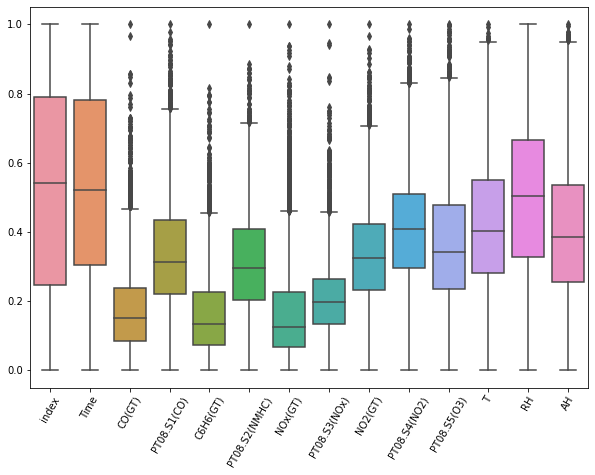

In [27]:
sns.boxplot(data=df_air_scaled, orient = 'v')
plt.xticks(rotation=60)

In [28]:
df_air_scaled.reset_index(inplace=True)

In [29]:
df_air_scaled['T'] = temperture
try:
    df_air_scaled.drop('Time', axis=1, inplace=True)
except:
    print('Что-то уже дропнули')
df_air_scaled.drop(['level_0', 'index'], axis=1, inplace=True)
df_air_scaled

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511845,0.184252,0.359649,0.111036,0.310885,0.335347,0.513040,0.454822,13.6,0.499371,0.287139
1,0.161017,0.463029,0.144882,0.309759,0.068382,0.360864,0.271903,0.453237,0.326238,13.3,0.484277,0.270955
2,0.177966,0.541996,0.138583,0.300987,0.087339,0.346463,0.338369,0.451439,0.370547,11.9,0.563522,0.283331
3,0.177966,0.523331,0.141732,0.305921,0.115098,0.326133,0.362538,0.464478,0.426586,11.0,0.638994,0.301618
4,0.127119,0.448672,0.099213,0.244518,0.087339,0.373994,0.344411,0.422212,0.386186,11.2,0.633962,0.302670
...,...,...,...,...,...,...,...,...,...,...,...,...
6936,0.254237,0.478823,0.209449,0.389803,0.318213,0.091910,0.567976,0.370054,0.655083,21.9,0.252830,0.286638
6937,0.194915,0.370424,0.176378,0.349232,0.237644,0.119441,0.534743,0.320594,0.455256,24.3,0.182390,0.264141
6938,0.194915,0.355348,0.192126,0.368969,0.197021,0.119017,0.522659,0.310252,0.378367,26.9,0.114465,0.228418
6939,0.169492,0.255564,0.146457,0.313048,0.157752,0.160949,0.465257,0.220324,0.238488,28.3,0.054088,0.164938


#### Выполните замену категориальных признаков
Категориальных признаков нет в датасете.

In [30]:
df_air_scaled.corr()['T']

CO(GT)           0.018334
PT08.S1(CO)      0.028277
C6H6(GT)         0.189003
PT08.S2(NMHC)    0.228333
NOx(GT)         -0.275998
PT08.S3(NOx)    -0.099495
NO2(GT)         -0.214325
PT08.S4(NO2)     0.566586
PT08.S5(O3)     -0.046146
T                1.000000
RH              -0.563909
AH               0.660638
Name: T, dtype: float64

In [31]:
df_air_scaled.drop(['CO(GT)', 'PT08.S1(CO)', 'PT08.S3(NOx)', 'PT08.S5(O3)'], axis=1, inplace=True)
df_air_scaled

,C6H6(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S4(NO2),T,RH,AH
0,0.184252,0.359649,0.111036,0.335347,0.513040,13.6,0.499371,0.287139
1,0.144882,0.309759,0.068382,0.271903,0.453237,13.3,0.484277,0.270955
2,0.138583,0.300987,0.087339,0.338369,0.451439,11.9,0.563522,0.283331
3,0.141732,0.305921,0.115098,0.362538,0.464478,11.0,0.638994,0.301618
4,0.099213,0.244518,0.087339,0.344411,0.422212,11.2,0.633962,0.302670
...,...,...,...,...,...,...,...,...
6936,0.209449,0.389803,0.318213,0.567976,0.370054,21.9,0.252830,0.286638
6937,0.176378,0.349232,0.237644,0.534743,0.320594,24.3,0.182390,0.264141
6938,0.192126,0.368969,0.197021,0.522659,0.310252,26.9,0.114465,0.228418
6939,0.146457,0.313048,0.157752,0.465257,0.220324,28.3,0.054088,0.164938


In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [33]:
X, y = df_air_scaled.drop('T', axis=1), df_air_scaled['T']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso

### LinearRegresion

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
reg.coef_

array([-24.9341207 ,   9.31304245,   4.33790809,  -1.83260993,
        14.72337288, -28.06790494,  28.34887598])

In [37]:
reg.intercept_

15.47379781271082

### Lasso

In [38]:
las = Lasso(alpha=0.1)
las.fit(X_train, y_train)

Lasso(alpha=0.1)

In [39]:
las.coef_

array([  0.        ,   0.        ,  -0.        ,  -0.        ,
         2.20261788, -25.69383971,  30.52515771])

In [40]:
las.intercept_

17.438191470417067

### Метрики

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
reg_pred = reg.predict(X_test)
las_pred = las.predict(X_test)

In [43]:
mean_squared_error(y_test, reg_pred), mean_squared_error(y_test, las_pred)

(5.588877634004779, 6.668227512026742)

In [44]:
mean_absolute_error(y_test, reg_pred), mean_absolute_error(y_test, las_pred)

(1.7653052360953054, 1.748719935491365)

In [45]:
from scipy.stats import pearsonr, spearmanr

In [49]:
print(f'Пирсон:\t\t{pearsonr(las_pred, y_test)[0]}')
print(f'Спирмен:\t{spearmanr(las_pred, y_test)[0]}')

Пирсон:		0.9594657213736033
Спирмен:	0.9764272885714309


In [50]:
print(f'Пирсон:\t\t{pearsonr(reg_pred, y_test)[0]}')
print(f'Спирмен:\t{spearmanr(reg_pred, y_test)[0]}')

Пирсон:		0.9630130600579386
Спирмен:	0.9785748801458551
